In [2]:
%load_ext autoreload
%autoreload 2

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns
from ipywidgets import interact, IntSlider

# Loading the data

For the character names and linguistic features extraction pipeline, please refer to `extract_character_attributes.ipynb`. And for the clusterization pipeline as well as the different clustering methods comparison refer to `clustering.ipynb`.

In [4]:
characters =  pd.read_csv(
    'data/character_clusters.csv', 
    index_col=0,
    converters={
        "adj": lambda x: x.strip("[]").replace("'","").split(", "), # need this to read list columns from csv
        "active": lambda x: x.strip("[]").replace("'","").split(", "),
        "patient": lambda x: x.strip("[]").replace("'","").split(", ")
        }
    )
characters.head()

,wiki_id,character,adj,active,patient,cluster
0,31186339,Peeta Mellark,[son],"[take, reveal, mean, form, present, beg, tell]",[force],29
1,31186339,Cato,[],[kill],"[encounter, wound, shoot]",55
2,31186339,Katniss,[],"[take, survive, drop, warn, run, shoot, presen...","[give, find, torment, spare, force, tell, warn]",2
3,31186339,Rue,[die],"[draw, care, draw, trap]","[hear, stab, comfort, kill]",1
4,31186339,Seneca Crane,[Gamemaker],"[change, lock]","[summon, convince]",1


In [5]:
movies = pd.read_csv(
    'data/MovieSummaries/movie.metadata.tsv', 
    sep='\t', 
    names=['wiki_id', 'freebase_id', 'title', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres']
)
movies.head()

,wiki_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
df_charac = pd.read_csv(
    'data/MovieSummaries/character.metadata.tsv', 
    sep='\t', 
    names=['wiki_id', 'freebase_id', 'release_date', 'character', 'date_of_birth', 'sex', 'height', '.','actor','age','character_map','..','...','....']
)
df_charac.head()

,wiki_id,freebase_id,release_date,character,date_of_birth,sex,height,.,actor,age,character_map,..,...,....
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN


In [7]:
characters_and_movies = characters.merge(movies, how='left', on='wiki_id').dropna()
characters_and_movies.head()

,wiki_id,character,adj,active,patient,cluster,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,31186339,Peeta Mellark,[son],"[take, reveal, mean, form, present, beg, tell]",[force],29,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
1,31186339,Cato,[],[kill],"[encounter, wound, shoot]",55,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,31186339,Katniss,[],"[take, survive, drop, warn, run, shoot, presen...","[give, find, torment, spare, force, tell, warn]",2,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
3,31186339,Rue,[die],"[draw, care, draw, trap]","[hear, stab, comfort, kill]",1,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
4,31186339,Seneca Crane,[Gamemaker],"[change, lock]","[summon, convince]",1,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."


In [8]:
characters_and_movies[characters_and_movies['title'].str.contains("Batman")][['title', 'character', 'cluster']]

,title,character,cluster
6348,Superman/Batman: Apocalypse,Superman,42
6349,Superman/Batman: Apocalypse,Batman,42
6350,Superman/Batman: Apocalypse,Barda,30
6351,Superman/Batman: Apocalypse,Kara,42
6352,Superman/Batman: Apocalypse,Darkseid,23
...,...,...,...
69321,Batman Forever,Riddler,42
69322,Batman Forever,Batman,42
69323,Batman Forever,Edward Nygma,56
69324,Batman Forever,Bruce Wayne,41


# Initial analysis of the actors' success

In [9]:
map_dict_to_list = lambda x: [value for key, value in eval(x).items()]
movies['languages'] = movies['languages'].apply(map_dict_to_list)
movies['countries'] = movies['countries'].apply(map_dict_to_list)
movies['genres'] = movies['genres'].apply(map_dict_to_list)
movies.head()

,wiki_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


Determine which character bring in the most money


In [91]:
# Merge the two datas
df_merged = df_charac.merge(movies, on=['wiki_id'], how='inner')

# Clean data of movies without box offic revenue
df_merged = df_merged.dropna(subset=['revenue'])

# Determine the actor and sum the box office revenue
actor_totalRevenue = df_merged.groupby(['actor'])['revenue'].agg(['sum', 'count']).reset_index()
actor_totalRevenue.columns = ['actor', 'bo_revenue', 'Actor Count']

# Sort the actor_revenue DataFrame in descending order
actor_revenue_sort = actor_totalRevenue.sort_values(by='bo_revenue', ascending=False)

#Extract only the top 20 best actors
actor_top20 = actor_revenue_sort.head(20)

# Merge the top 20 actors with original datas
top20_actor_data = actor_top20.merge(df_merged[['actor', 'languages','sex']], on='actor', how='left')
top20_actor_data = top20_actor_data.drop_duplicates(subset = ['actor'])
top20_actor_data.head()

,actor,bo_revenue,Actor Count,languages,sex
0,Warwick Davis,1.293016e+10,19,"[Croatian language, English Language]",M
19,Samuel L. Jackson,1.278943e+10,72,"[Russian Language, English Language]",M
91,Frank Welker,1.028744e+10,61,"[English Language, Spanish Language]",M
152,Alan Rickman,1.020871e+10,29,"[Croatian language, English Language]",M
181,Robbie Coltrane,1.009465e+10,30,"[Croatian language, English Language]",M


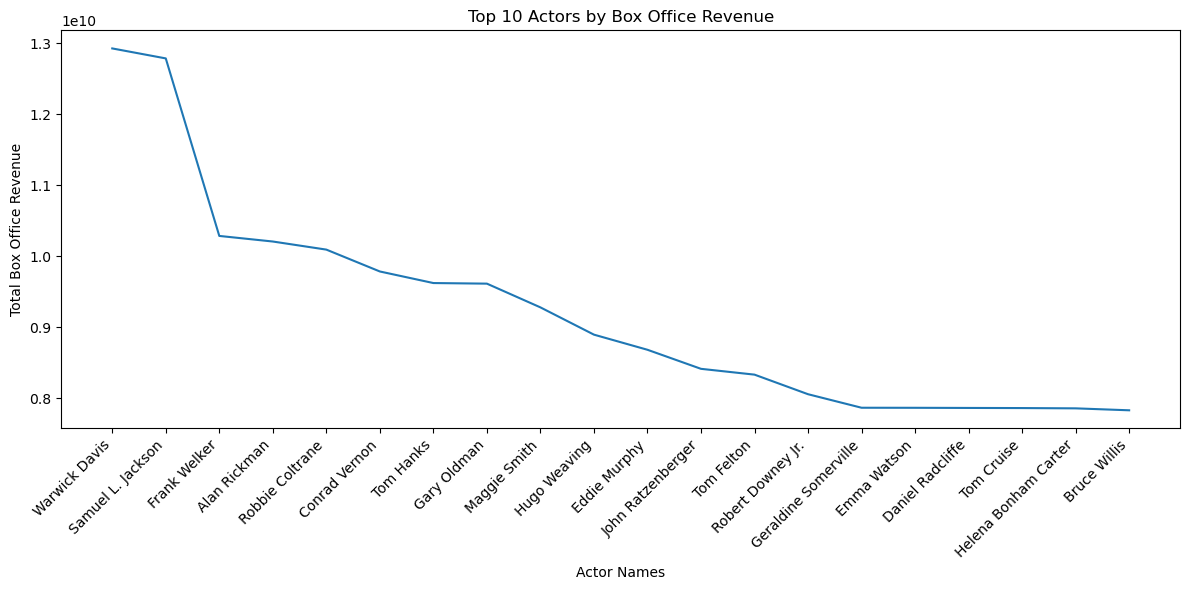

In [11]:
# Plot the data above
actor_names = top20_actor_data['actor']
revenues_total = top20_actor_data['bo_revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names, revenues_total)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 10 Actors by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()



In the data above, we are ranking the actors according to the box office revenue of the movies they acted in.

Study the main lead actors obtaining the highest revenue

In [12]:
def calculater_importance(x):
    a = 0
    for w in x["adj"]:
        a += w.isalpha()
    for w in x["active"]:
        a += w.isalpha()
    for w in x["patient"]:
        a += w.isalpha()
    return a

characters['importance'] = characters.apply(calculater_importance, axis=1)

characters_with_importance = characters[['wiki_id', 'character', 'importance']]
characters_with_importance.head()

,wiki_id,character,importance
0,31186339,Peeta Mellark,9
1,31186339,Cato,4
2,31186339,Katniss,18
3,31186339,Rue,9
4,31186339,Seneca Crane,5


In [50]:
characters_with_importance['importance_share'] = characters_with_importance['importance'] / characters_with_importance.groupby('wiki_id')['importance'].transform('sum')
characters_with_importance['is_important'] = characters_with_importance['importance_share'] >= 0.2
characters_with_importance.sample(10)

C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\1073324314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_with_importance['importance_share'] = characters_with_importance['importance'] / characters_with_importance.groupby('wiki_id')['importance'].transform('sum')
C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\1073324314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_with_importance['is_important'] = characters_with_importance['importance_share'] >= 0.2


,wiki_id,character,importance,importance_share,is_important
12790,3150498,Gorillas,6,0.193548,False
19326,9175716,Girl,7,0.583333,True
33117,27792643,Alice,14,0.142857,False
70443,10997890,Elsa,9,0.375000,True
19664,25194677,Gordon Keane,3,0.166667,False
14842,33857489,Claire,4,0.133333,False
72917,1267713,Charles,3,0.078947,False
60483,4920511,Doris Koster,7,0.411765,True
63079,239587,Gill,3,0.063830,False
22364,32849281,Cheryl,3,0.230769,True


In [53]:
df_charac_actor = df_merged[['wiki_id', 'character','actor','revenue','title']]
df_charac_actor.sample(10)


,wiki_id,character,actor,revenue,title
427813,4299508,Aaron,Simon McBurney,18245244.0,Friends with Money
112481,3608326,NaN,Marie-Noelle Marquis,56127.0,National Lampoon Presents Dorm Daze
90902,5638224,Mrs. Shorn,Jane Russell,36000000.0,The Born Losers
404296,891829,Nina,Bebe Neuwirth,5078660.0,Celebrity
322131,33222541,Martin David,Willem Dafoe,1051613.0,The Hunter
102642,6703160,Master Oliver,Wilfrid Hyde-White,1200000.0,The Adventures of Quentin Durward
153430,4179782,NaN,Ice T,21756163.0,Ricochet
53610,2592877,NaN,French Stewart,2924635.0,Love Stinks
36235,1173339,Sean Brody,John Putch,87987055.0,Jaws 3-D
65204,8175422,NaN,Peter Horton,102414859.0,T-Rex: Back to the Cretaceous


In [58]:
# Include characters and actors together in the same dataset
character_actor = df_charac_actor.merge(characters_with_importance, on=['wiki_id', 'character'])

character_actor

,wiki_id,character,actor,revenue,title,importance,importance_share,is_important
0,975900,Desolation Williams,Ice Cube,14010832.0,Ghosts of Mars,4,0.444444,True
1,2238856,Heather,Natasha Slayton,8012838.0,Me and You and Everyone We Know,3,0.500000,True
2,156558,Yvette,Taraji P. Henson,29381649.0,Baby Boy,17,0.354167,True
3,156558,Jody,Tyrese Gibson,29381649.0,Baby Boy,19,0.395833,True
4,156558,Rodney,Snoop Dogg,29381649.0,Baby Boy,12,0.250000,True
...,...,...,...,...,...,...,...,...
9827,25920477,Colleen Goodwin,Vera Farmiga,147332697.0,Source Code,7,0.291667,True
9828,25920477,Derek Frost,Michael Arden,147332697.0,Source Code,3,0.125000,False
9829,6456053,Mae Jenkins,Shirley MacLaine,5400000.0,The Yellow Rolls-Royce,5,0.416667,True
9830,6456053,Davich,Omar Sharif,5400000.0,The Yellow Rolls-Royce,3,0.250000,True


In [65]:
df_charac_actor = df_merged[['wiki_id', 'character','actor','revenue','title']]

# Include characters and actors together in the same dataset
character_actor = df_charac_actor.merge(characters_with_importance, on=['wiki_id', 'character'])

# Merge only the main charac of movies\n",
main_character = character_actor[character_actor['is_important'] == True]

#Add up the Box office revenue and count the occurance of movie appearance
main_charac_mergedBOR = main_character.groupby(['actor'])['revenue'].agg(['sum', 'count']).reset_index()

main_charac_sort = main_charac_mergedBOR.sort_values(by='sum', ascending=False)

main_charac_top20 = main_charac_sort.head(20)
main_charac_top20.head()

,actor,sum,count
2263,Tom Cruise,5.690064e+09,19
520,Daniel Radcliffe,5.058613e+09,6
2265,Tom Hanks,4.577922e+09,18
1409,Leonardo DiCaprio,4.059193e+09,8
1595,Mel Gibson,4.048504e+09,22


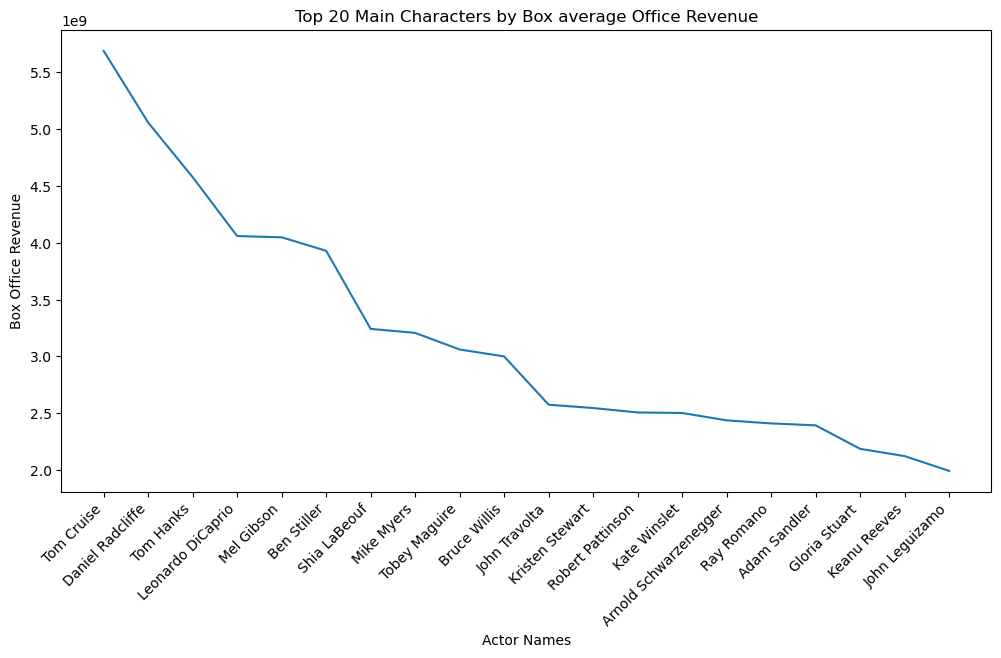

In [15]:
# Plot the charts for main actors\n",
main_charac_top20_names = main_charac_top20['actor']
main_charac_revenue = main_charac_top20['sum']

plt.figure(figsize=(12, 6))
plt.plot(main_charac_top20_names,main_charac_revenue)
plt.xlabel('Actor Names')
plt.ylabel('Box Office Revenue')
plt.title('Top 20 Main Characters by Box average Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.show()

Male or female perform better in generating box office revenue?

In [16]:
gender_actor_data = actor_revenue_sort.merge(df_charac[['actor', 'sex']], on='actor', how='left')
gender_actor_data = gender_actor_data.drop_duplicates(subset = ['actor'])
gender_actor_data.head()

,actor,bo_revenue,Actor Count,sex
0,Warwick Davis,1.293016e+10,19,M
31,Samuel L. Jackson,1.278943e+10,72,M
137,Frank Welker,1.028744e+10,61,M
320,Alan Rickman,1.020871e+10,29,M
362,Robbie Coltrane,1.009465e+10,30,M


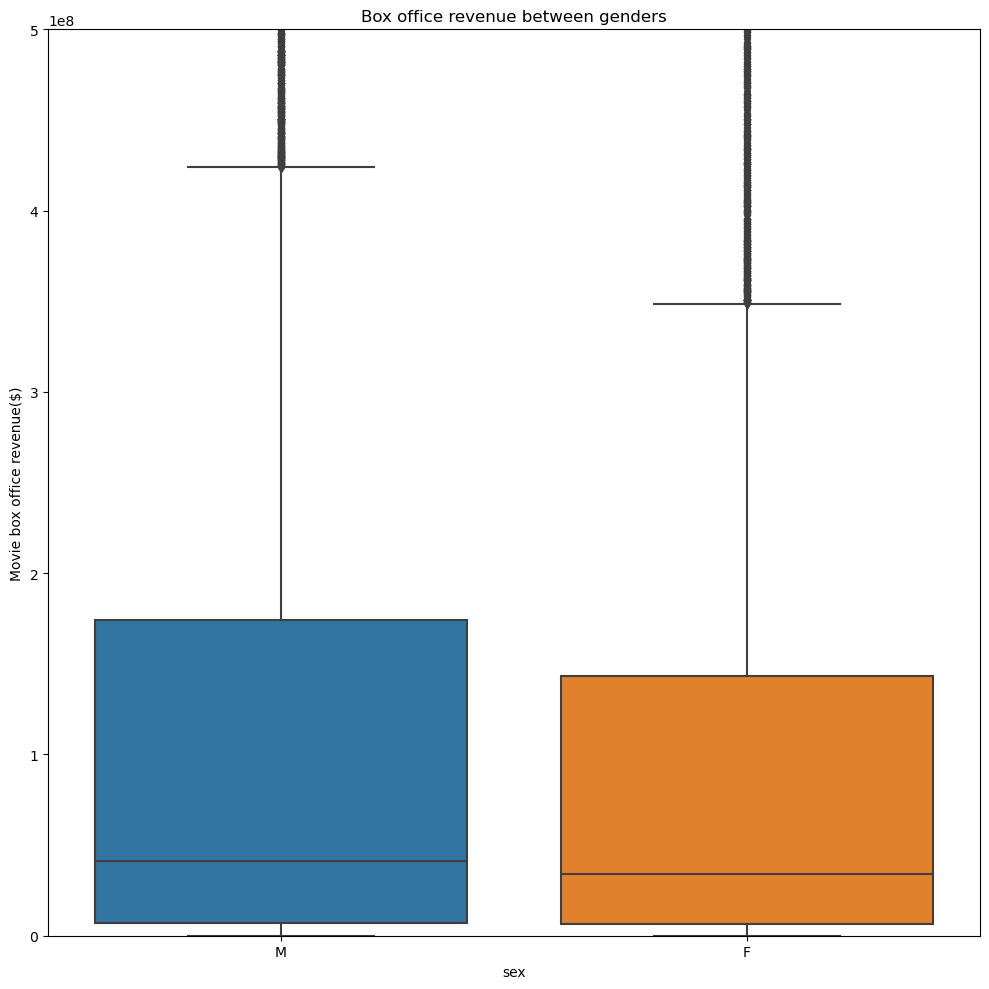

In [17]:
# Include gender into the data for box plot aalysis
gender_actor_data = actor_revenue_sort.merge(df_charac[['actor', 'sex']], on='actor', how='left')
gender_actor_data = gender_actor_data.drop_duplicates(subset = ['actor'])

# Box plot for revenue between genders
plt.figure(figsize=(10, 10))
gender_boxplot = sns.boxplot(x="sex", y="bo_revenue", data=gender_actor_data.loc[gender_actor_data['sex'].isin(['M','F'])])

# Set labels
plt.ylabel("Movie box office revenue($)")
plt.title("Box office revenue between genders")
plt.ylim(0, 500000000)
          
#Show plot
plt.tight_layout()
plt.show()

# Given the variance and the 25th percentile, 75th percentile and medan, male actors drive higher box office revenue."

Study the language used in top 50 films / Which language drive the highest revenue?

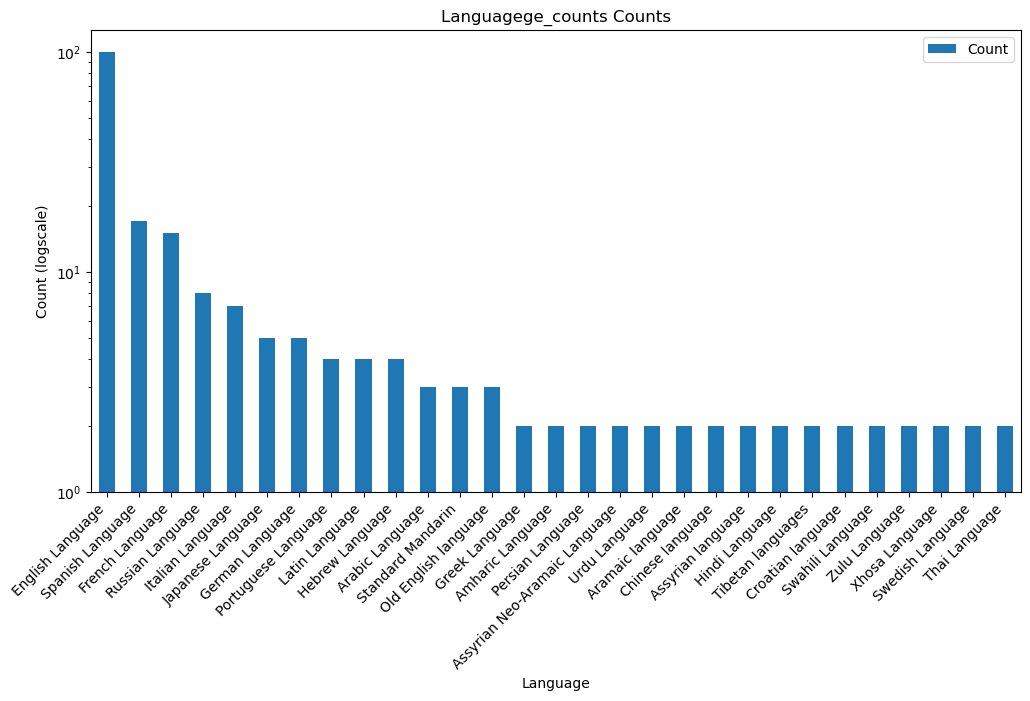

In [18]:
# Extract the top 100 movies
film_sort = df_merged[['countries','languages','revenue','wiki_id']]
film_sort = film_sort.drop_duplicates(subset = ['wiki_id'])
film_sort = film_sort.sort_values(by='revenue', ascending=False)
top100film = film_sort.head(100)

# Split the language into new data frames\
df_split_languages = top100film.explode('languages')

# Count the occurance of the languages
language_counts = df_split_languages['languages'].value_counts()
df_language_counts = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# Plot the data
df_language_counts.plot(kind='bar', x='Language', y='Count', figsize=(12, 6),log=True)
plt.title('Languagege_counts Counts')
plt.xlabel('Language')
plt.ylabel('Count (logscale)')
plt.xticks(rotation=45, ha='right')
plt.show()

Study the genre of movies that earn the highest revenue.

In [92]:
df_merged.head()

,wiki_id,freebase_id_x,release_date_x,character,date_of_birth,sex,height,.,actor,age,...,...,....,freebase_id_y,title,release_date_y,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/03wcfv7,NaN,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0346l4,NaN,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/01vw26l,NaN,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/034hyc,NaN,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/01y9xg,NaN,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Action/Adventure'),
  Text(6, 0, 'Fantasy'),
  Text(7, 0, 'Romance Film'),
  Text(8, 0, 'Family Film'),
  Text(9, 0, 'Science Fiction')])

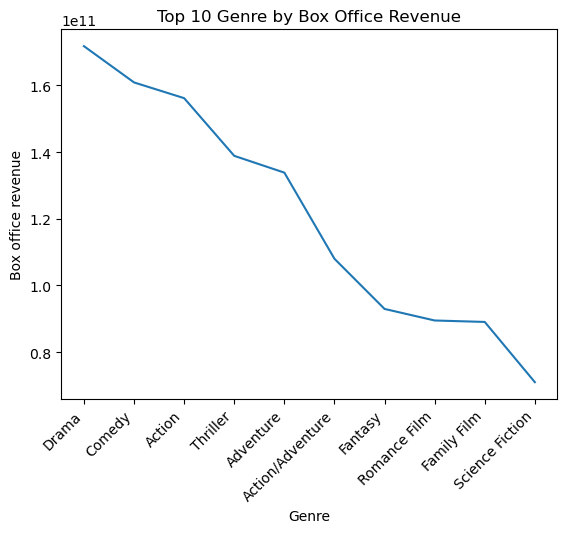

In [95]:
#Clean data to remove repeated movies
df_clean_split_genres = df_merged[['title','genres','revenue','wiki_id']]
df_clean_split_genres = df_clean_split_genres.drop_duplicates(subset = ['wiki_id'])

# Split the genre into new data frames
df_split_genre = df_clean_split_genres.explode('genres')[['wiki_id','title', 'revenue', 'genres']]

# Determine the actor and sum the box office revenue
genre_totalRevenue = df_split_genre.groupby('genres')['revenue'].sum().reset_index()

# Sort the BOR in ascending order
genre_totalRevenue = genre_totalRevenue.sort_values(by='revenue', ascending=False)
genre_totalRevenue_top10 = genre_totalRevenue.head(10)

genre = genre_totalRevenue_top10['genres']
genreRevenue = genre_totalRevenue_top10['revenue']

#Plot the charts
plt.plot(genre, genreRevenue)
plt.xlabel('Genre')
plt.ylabel('Box office revenue')
plt.title('Top 10 Genre by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

<h4> Account for inflation for actors with NO prority for main actors

In [20]:
# Extract the relevent information required for inflation calculation
inf_revenue = df_merged[['wiki_id','release_date_x','character','actor','title','revenue']]
inf_revenue.head()

,wiki_id,release_date_x,character,actor,title,revenue
0,975900,2001-08-24,Akooshay,Wanda De Jesus,Ghosts of Mars,14010832.0
1,975900,2001-08-24,Lieutenant Melanie Ballard,Natasha Henstridge,Ghosts of Mars,14010832.0
2,975900,2001-08-24,Desolation Williams,Ice Cube,Ghosts of Mars,14010832.0
3,975900,2001-08-24,Sgt Jericho Butler,Jason Statham,Ghosts of Mars,14010832.0
4,975900,2001-08-24,Bashira Kincaid,Clea DuVall,Ghosts of Mars,14010832.0


In [21]:
# Convert the values to datetime format
release_year = pd.to_datetime(inf_revenue['release_date_x'], errors='coerce')

# Extract the year
release_year = release_year.dt.year
release_year = pd.to_numeric(release_year, errors='coerce').astype('Int64')

# Append year into the data
inf_revenue['year'] = release_year

# Display the result
inf_revenue.head()

C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2717802652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_revenue['year'] = release_year


,wiki_id,release_date_x,character,actor,title,revenue,year
0,975900,2001-08-24,Akooshay,Wanda De Jesus,Ghosts of Mars,14010832.0,2001
1,975900,2001-08-24,Lieutenant Melanie Ballard,Natasha Henstridge,Ghosts of Mars,14010832.0,2001
2,975900,2001-08-24,Desolation Williams,Ice Cube,Ghosts of Mars,14010832.0,2001
3,975900,2001-08-24,Sgt Jericho Butler,Jason Statham,Ghosts of Mars,14010832.0,2001
4,975900,2001-08-24,Bashira Kincaid,Clea DuVall,Ghosts of Mars,14010832.0,2001


In [22]:
# Determine the earliest data available
min_year = inf_revenue['year'].min()
min_year

1897

In [23]:
# Load the CPI data
cpi_data = pd.read_csv('data/cpi_data.csv', )
cpi_data.head()

,year,cpi
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8


In [24]:
# Merging CPI data based on the year
inf_revenue_cpi = pd.merge(inf_revenue, cpi_data, left_on='year', right_on='year', how='left')

# Calculate the adjusted revenue by dividing movie revenue by CPI
# formula: adjusted_revenue = (revenue / CPI)*100
inf_revenue_cpi['adjusted_revenue'] = (inf_revenue_cpi['revenue'] / (inf_revenue_cpi['cpi']) * 100)

# Determine the actor and sum the box office revenue
inf_actor_totalRevenue = inf_revenue_cpi.groupby(['actor'])['adjusted_revenue'].agg(['sum', 'count']).reset_index()
inf_actor_totalRevenue.columns = ['actor', 'adjusted_revenue', 'actor_count']

# Sort the actor_revenue DataFrame in descending order
cpi_revenue_sum = inf_actor_totalRevenue.sort_values(by='adjusted_revenue', ascending=False)

#Extract only the top 20 best actors
cpi_actor_top20 = cpi_revenue_sum.head(20)

# Merge the top 20 actors with original datas
cpi_actor_top20 = cpi_actor_top20.merge(df_merged[['actor', 'languages','sex']], on='actor', how='left')
cpi_actor_top20 = cpi_actor_top20.drop_duplicates(subset = ['actor'])
cpi_actor_top20.head()

,actor,adjusted_revenue,actor_count,languages,sex
0,Warwick Davis,6.976736e+09,19,"[Croatian language, English Language]",M
19,Samuel L. Jackson,6.686787e+09,65,"[Russian Language, English Language]",M
91,Frank Welker,6.177389e+09,60,"[English Language, Spanish Language]",M
152,Harrison Ford,6.071740e+09,36,"[German Language, English Language]",M
190,Tom Hanks,5.451145e+09,45,[English Language],M


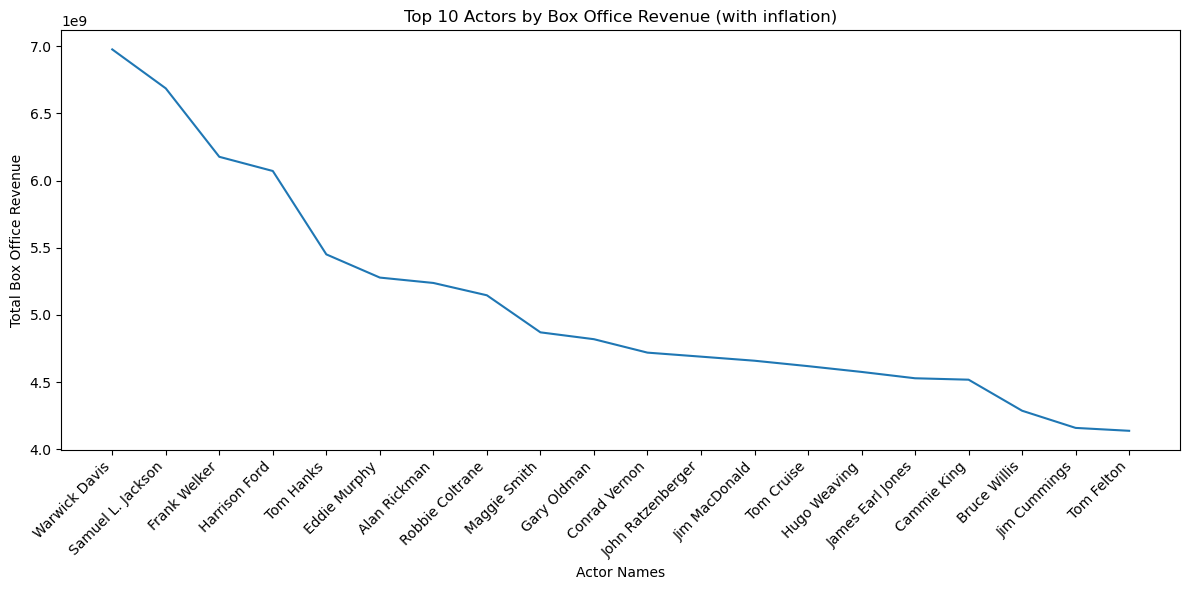

In [25]:
# Plot the data above
actor_names_cpi = cpi_actor_top20['actor']
revenues_total_cpi = cpi_actor_top20['adjusted_revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names_cpi, revenues_total_cpi)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 10 Actors by Box Office Revenue (with inflation)')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

<h4> Account for inflation for actors with prority for main actors

In [26]:
main_charac_cpi = main_charac_mergedBOR.merge(inf_revenue[['actor', 'title', 'year','revenue']], on='actor', how='left')

# remove duplicated actors
main_charac_cpi = main_charac_cpi.drop_duplicates(subset = ['actor'])

#remove data without year
main_charac_cpi = main_charac_cpi.dropna(subset=['year'])

# Merging CPI data based on the year
mc_revenue_cpi = pd.merge(main_charac_cpi, cpi_data, left_on='year', right_on='year', how='left')
mc_revenue_cpi.head()

,actor,sum,count,title,year,revenue,cpi
0,50 Cent,49009245.0,2,Get Rich or Die Tryin',2005,46442528.0,195.300
1,A. J. Langer,42277365.0,1,John Carpenter's Escape from L.A.,1996,42277365.0,156.900
2,Aaron Eckhart,100418386.0,4,Suspect Zero,2004,11416075.0,188.900
3,Aaron Johnson,170312003.0,2,The Illusionist,2006,87892388.0,201.600
4,Aaron Paul,1754640.0,1,The Last House on the Left,2009,45286228.0,214.537


In [27]:
# Calculate the adjusted revenue by dividing movie revenue by CPI
# formula: adjusted_revenue = (revenue / CPI)*100
mc_revenue_cpi['adjusted_revenue'] = (mc_revenue_cpi['revenue'] / (mc_revenue_cpi['cpi']) * 100)

# Determine the actor and sum the box office revenue
mc_totalRevenue_cpi = mc_revenue_cpi.groupby(['actor'])['adjusted_revenue'].agg(['sum', 'count']).reset_index()
mc_totalRevenue_cpi.columns = ['actor', 'adjusted_revenue', 'actor_count']

# Sort the actor_revenue DataFrame in descending order
mc_totalRevenue_cpi_sort = mc_totalRevenue_cpi.sort_values(by='adjusted_revenue', ascending=False)

#Extract only the top 20 best actors
cpi_mc_actor_top20 = mc_totalRevenue_cpi_sort.head(20)

# Merge the top 20 actors with original datas
cpi_mc_actor_top20 = cpi_mc_actor_top20.merge(df_merged[['actor', 'languages','sex']], on='actor', how='left')
cpi_mc_actor_top20 = cpi_mc_actor_top20.drop_duplicates(subset = ['actor'])
cpi_mc_actor_top20.head()

,actor,adjusted_revenue,actor_count,languages,sex
0,Lucille La Verne,2.888889e+09,1,[English Language],F
1,Cammie King,2.877698e+09,1,[English Language],F
3,Bobby Stewart,1.640780e+09,1,[English Language],M
4,Donnie Dunagan,1.640780e+09,1,[English Language],M
5,John Sutherland,1.640780e+09,1,[English Language],M


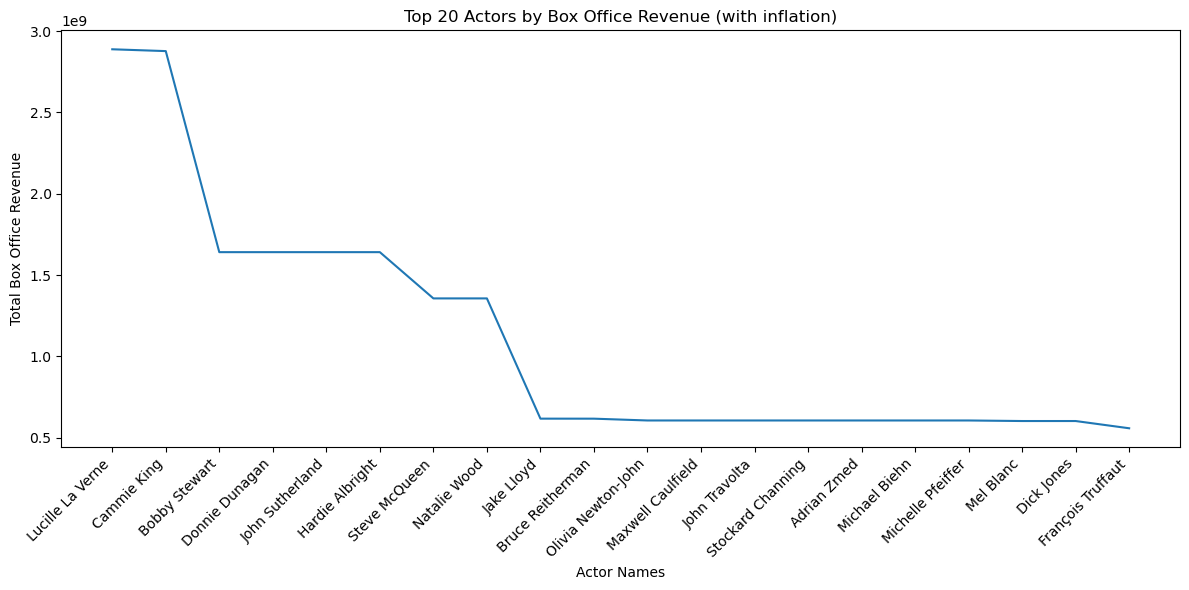

In [28]:
# Plot the data above
actor_names_cpi_main = cpi_mc_actor_top20['actor']
revenues_total_cpi_main = cpi_mc_actor_top20['adjusted_revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names_cpi_main, revenues_total_cpi_main)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 20 Actors by Box Office Revenue (with inflation)')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

<h4> Giving weights to different importance to actors

In [29]:
characters_with_importance.head()

,wiki_id,character,importance,importance_share,is_important
0,31186339,Peeta Mellark,9,0.200000,True
1,31186339,Cato,4,0.088889,False
2,31186339,Katniss,18,0.400000,True
3,31186339,Rue,9,0.200000,True
4,31186339,Seneca Crane,5,0.111111,False


In [30]:
df_charac_actor.head()

,wiki_id,character,actor,revenue
0,975900,Akooshay,Wanda De Jesus,14010832.0
1,975900,Lieutenant Melanie Ballard,Natasha Henstridge,14010832.0
2,975900,Desolation Williams,Ice Cube,14010832.0
3,975900,Sgt Jericho Butler,Jason Statham,14010832.0
4,975900,Bashira Kincaid,Clea DuVall,14010832.0


In [31]:
# This data accounts for inflation, multiplying the importance foactor to the actors income
merged_char_impt = df_charac_actor.merge(characters_with_importance, on=['character'], how='inner')
merged_char_impt = merged_char_impt.drop_duplicates(subset=['actor', 'character'])
merged_char_impt.head(20)

,wiki_id_x,character,actor,revenue,wiki_id_y,importance,importance_share,is_important
0,975900,Desolation Williams,Ice Cube,14010832.0,975900,4,0.444444,True
1,975900,Uno,Duane Davis,14010832.0,24971148,9,0.375000,True
2,975900,Zimmerman,Rick Edelstein,14010832.0,9170067,3,0.176471,False
5,2525385,Zimmerman,Ivan J. Rado,6424112.0,9170067,3,0.176471,False
8,2238856,Michael,Hector Elias,8012838.0,15161056,13,0.282609,True
127,320502,Michael,Donald Sutherland,779137.0,15161056,13,0.282609,True
246,4694464,Michael,Chris Kattan,330116.0,15161056,13,0.282609,True
365,390436,Michael,Marc John Jefferies,182436254.0,15161056,13,0.282609,True
484,30885871,Michael,John C. Reilly,27520098.0,15161056,13,0.282609,True
603,73441,Michael,Robert MacNaughton,792910554.0,15161056,13,0.282609,True


In [32]:
# This data accounts for inflation, multiplying the importance foactor to the actors income
merged_char_impt = df_charac_actor.merge(characters_with_importance, on=['character'], how='inner')

# Remove actors that are duplicated
merged_char_impt = merged_char_impt.drop_duplicates(subset=['actor', 'character'])

# multiply importance_share with revenue. the value will give a measure of how impt the actors are
merged_char_impt['impt_revenue'] = (merged_char_impt['importance_share'] * merged_char_impt['revenue'] ) / merged_char_impt['revenue']

# Sum up the impt_revenue
merged_char_impt = merged_char_impt.groupby(['actor'])['impt_revenue'].agg(['sum', 'count']).reset_index()
merged_char_impt.columns = ['actor', 'impt_revenue', 'actor_count']

# Sort the data in decending order
merged_char_impt_sort = merged_char_impt.sort_values(by='impt_revenue', ascending=False)

merged_char_impt_sort_top20 = merged_char_impt_sort.head(20)
merged_char_impt_sort_top20.head()


,actor,impt_revenue,actor_count
9610,Robert De Niro,12.068949,31
2183,Clint Eastwood,11.561851,22
9714,Robin Williams,11.029792,28
8490,Nicolas Cage,10.884312,29
5599,John Travolta,10.513957,24


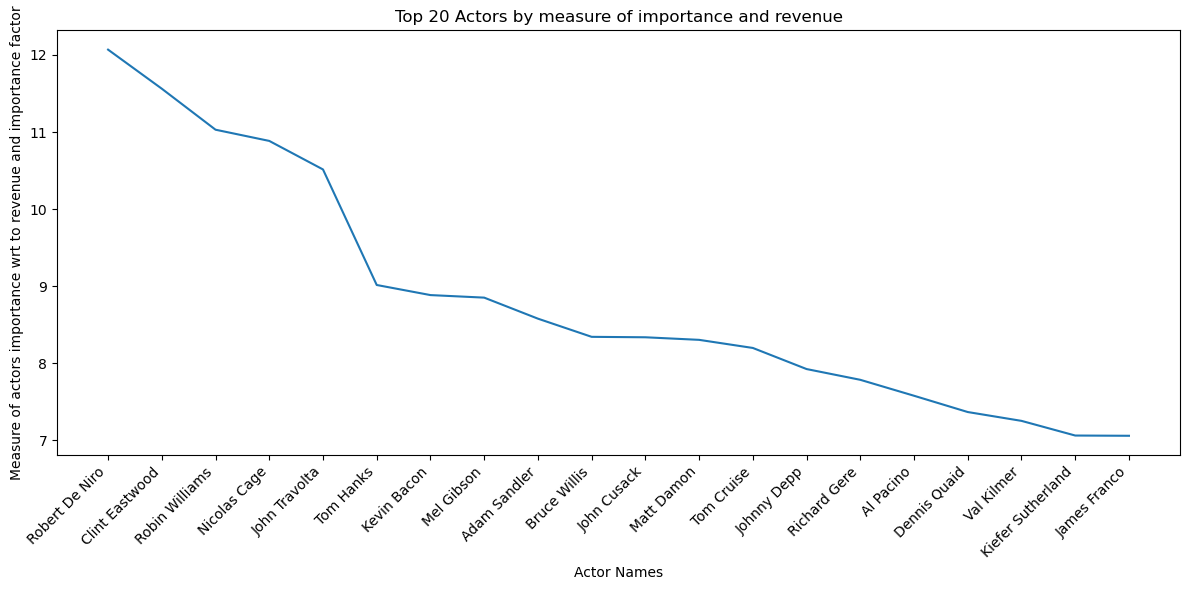

In [33]:
# Plot the data above
impt_revenue_actor_main = merged_char_impt_sort_top20['actor']
impt_revenue_revenue_main = merged_char_impt_sort_top20['impt_revenue']

plt.figure(figsize=(12, 6))
plt.plot(impt_revenue_actor_main, impt_revenue_revenue_main )
plt.xlabel('Actor Names')
plt.ylabel('Measure of actors importance wrt to revenue and importance factor')
plt.title('Top 20 Actors by measure of importance and revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

In [34]:
# Taking the average of the data by dividing it with the number of movies they acted in
merged_char_impt_sort [ 'impt_revenue_avg'] = merged_char_impt_sort ['impt_revenue'] / merged_char_impt_sort ['actor_count']

# Sort the data in decending order
avg_char_impt_sort = merged_char_impt_sort.sort_values(by='impt_revenue', ascending=False)
avg_char_impt_sort = avg_char_impt_sort.head(20)



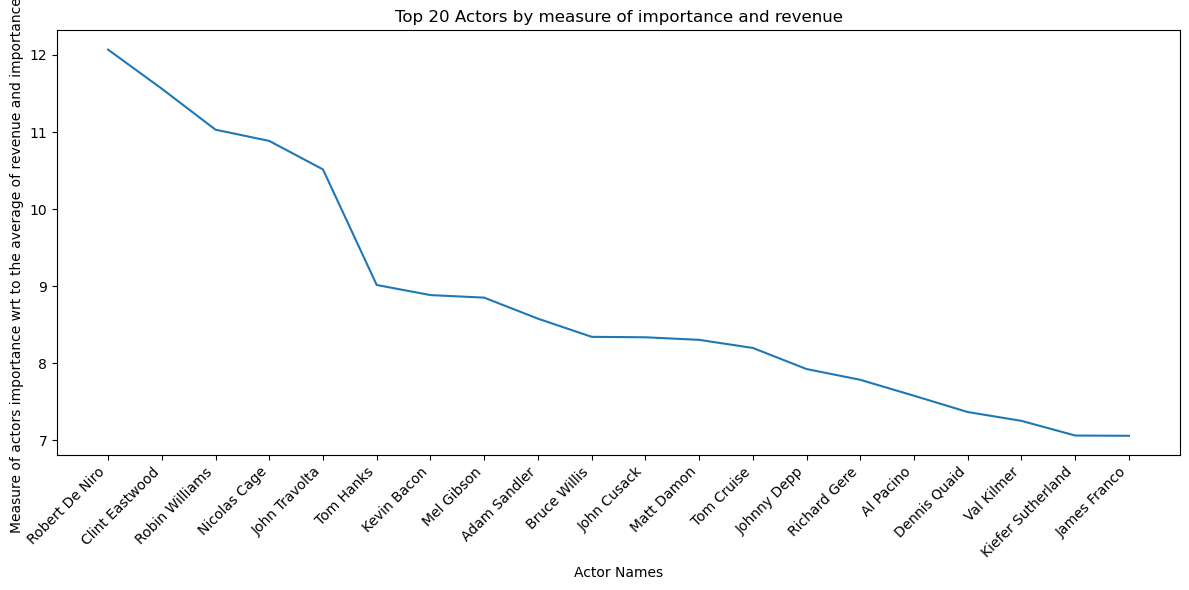

In [35]:
# Plot the data above
avg_char_impt_sort_main_actor = avg_char_impt_sort['actor']
avg_char_impt_sort_main_revenue = avg_char_impt_sort['impt_revenue']

plt.figure(figsize=(12, 6))
plt.plot(avg_char_impt_sort_main_actor, avg_char_impt_sort_main_revenue )
plt.xlabel('Actor Names')
plt.ylabel('Measure of actors importance wrt to the average of revenue and importance factor')
plt.title('Top 20 Actors by measure of importance and revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

<h2> Plotting the actor's success based on their rating

In [73]:
main_char_rating = main_character.merge(df_rating[['averageRating','wiki_id']], on=['wiki_id'], how='inner')
main_char_rating.sample(5)

,wiki_id,character,actor,revenue,title,importance,importance_share,is_important,averageRating
2553,468326,Jack Jordan,Benicio del Toro,60427839.0,21 Grams,14,0.341463,True,7.6
3612,1204611,Josh Framm,Kevin Zegers,23144499.0,Air Bud,15,1.000000,True,5.3
1188,877220,Ashe Corven,Vincent Pérez,17917287.0,The Crow: City of Angels,18,0.382979,True,4.6
3468,33222541,Martin David,Willem Dafoe,1051613.0,The Hunter,31,0.596154,True,6.7
4193,647756,Bruce Lee,Jason Scott Lee,63513713.0,Dragon: The Bruce Lee Story,23,0.638889,True,7.0


In [80]:
# Ranking the top 20 characters and ignoring the importance factor number
# Sum up the impt_revenue
main_char_rating_sum = main_char_rating.groupby(['actor'])['averageRating'].agg(['sum', 'count']).reset_index()
main_char_rating_sum.columns = ['actor', 'averageRating', 'actor_count']
main_char_rating_sum['avgActorRating'] = main_char_rating_sum['averageRating'] / main_char_rating_sum['actor_count']
main_char_rating_sum = main_char_rating_sum[['actor', 'avgActorRating']] 

# Sort the data in decending order
main_char_rating_sum_sort = main_char_rating_sum.sort_values(by='avgActorRating', ascending=False)

main_char_rating_sum_sort_top20 = main_char_rating_sum_sort.head(20)
main_char_rating_sum_sort_top20.head()

,actor,avgActorRating
1598,Nicoletta Braschi,8.6
1489,Michael Clarke Duncan,8.6
822,Henry Fonda,8.5
678,F. Murray Abraham,8.4
671,Eva Marie Saint,8.3


In [85]:
# multiply importance_share with revenue. the value will give a measure of how impt the actors are
avg_main_char_rating = main_char_rating_sum = main_char_rating.groupby(['actor'])['averageRating'].agg(['sum', 'count']).reset_index()
avg_main_char_rating['impt_rating'] = (main_char_rating['importance_share'] * main_char_rating['averageRating'] )

# Sort the data in decending order
avg_main_char_rating_sort = avg_main_char_rating.sort_values(by='impt_rating', ascending=False)

avg_main_char_rating_sort_top20 = avg_main_char_rating_sort.head(20)
avg_main_char_rating_sort_top20.head()

,actor,sum,count,impt_rating
121,Anne Baxter,8.2,1,8.1
1849,Ryan Gosling,56.0,8,8.0
952,Jay Chou,12.8,2,7.8
1043,Johanna Braddy,4.6,1,7.8
1127,Judi Dench,14.4,2,7.8


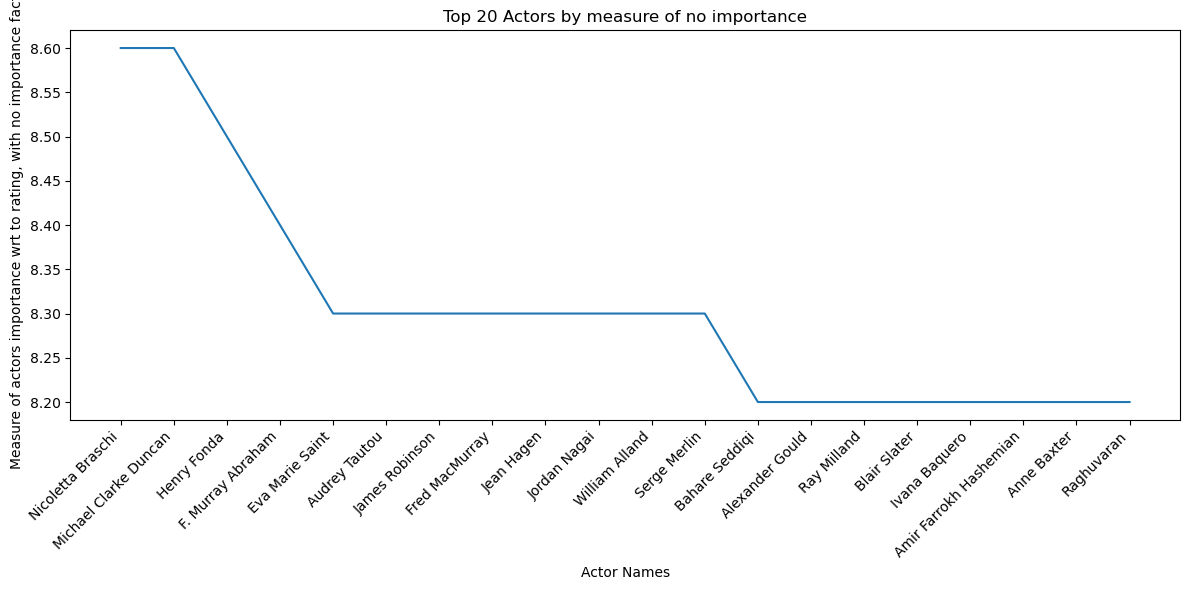

In [87]:
# Plot the data for top 20 characters and ignoring the importance factor number
main_rating_actor_main = main_char_rating_sum_sort_top20['actor']
main_rating_revenue_main = main_char_rating_sum_sort_top20['avgActorRating']

plt.figure(figsize=(12, 6))
plt.plot(main_rating_actor_main, main_rating_revenue_main )
plt.xlabel('Actor Names')
plt.ylabel('Measure of actors importance wrt to rating, with no importance factor')
plt.title('Top 20 Actors by measure of no importance')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

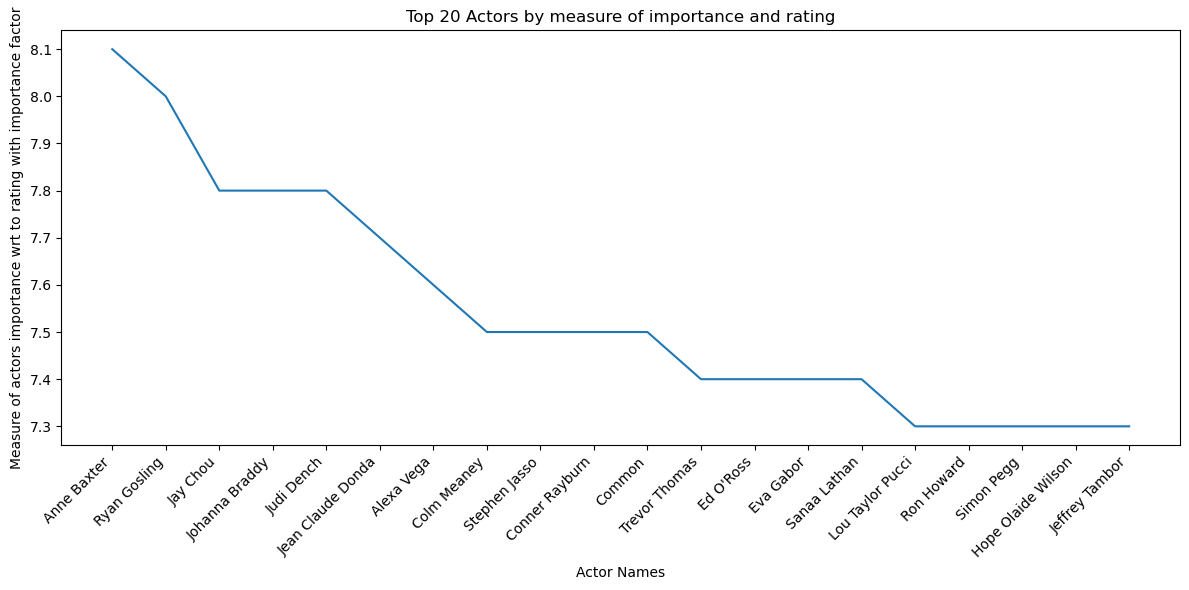

In [88]:
# Plot the data for top 20 characters and ignoring the importance factor number
avg_main_rating_actor_main = avg_main_char_rating_sort_top20['actor']
avg_main_rating_revenue_main = avg_main_char_rating_sort_top20['impt_rating']

plt.figure(figsize=(12, 6))
plt.plot(avg_main_rating_actor_main, avg_main_rating_revenue_main )
plt.xlabel('Actor Names')
plt.ylabel('Measure of actors importance wrt to rating with importance factor')
plt.title('Top 20 Actors by measure of importance and rating')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

<h2> Change of preference for genre over the years (Slider bar)

In [109]:
# Determine duration of available data
max_year = inf_revenue['year'].max()
min_year = inf_revenue['year'].min()

# Calcualte the duration of the data 
year_duration_length = max_year - min_year

year_duration = [min_year, max_year, year_duration_length]
year_duration

[1897, 2012, 115]

In [160]:
genre_year = df_split_genre.merge(inf_revenue[['wiki_id','year']] , on=['wiki_id'])
genre_year.head()

,wiki_id,title,revenue,genres,year
0,975900,Ghosts of Mars,14010832.0,Thriller,2001
1,975900,Ghosts of Mars,14010832.0,Thriller,2001
2,975900,Ghosts of Mars,14010832.0,Thriller,2001
3,975900,Ghosts of Mars,14010832.0,Thriller,2001
4,975900,Ghosts of Mars,14010832.0,Thriller,2001


In [169]:
# Create an empty DataFrame to store the results
top_genres_overall = pd.DataFrame()

# Iterate over the years from 2012 to 1897
for year in range(2012, 1896, -1):  # Reverse order from 2012 to 1897
    # Filter for the current year
    genre_year_filtered = genre_year[genre_year['year'] == year]

    # Group by 'genres' and aggregate revenue
    top_genres_year = genre_year_filtered.groupby('genres')['revenue'].sum().reset_index()

    # Sort by revenue in descending order
    top_genres_year = top_genres_year.sort_values('revenue', ascending=False)

    # Select the top five genres for the current year
    top5_genres_year = top_genres_year.head(10)

    # Add a column for the year
    top5_genres_year['year'] = year

    # Exclude the first row (title) for the specified years
    if 2009 <= year <= 2011:
        top10_genres_year = top5_genres_year.iloc[1:].reset_index(drop=True)

    # Append the current year's top genres to the overall DataFrame
    top_genres_overall = pd.concat([top_genres_overall, top5_genres_year], ignore_index=True)
    
print(top_genres_overall)

C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2579503968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_genres_year['year'] = year
C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2579503968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_genres_year['year'] = year
C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2579503968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

              genres       revenue  year
0             Action  1.745332e+11  2012
1              Drama  1.103105e+11  2012
2    Science Fiction  1.029477e+11  2012
3          Adventure  8.756013e+10  2012
4             Comedy  8.508140e+10  2012
..               ...           ...   ...
875      Silent film  1.033173e+07  1914
876        Adventure  9.000000e+06  1914
877          Western  3.317280e+05  1914
878            Drama  2.447000e+05  1914
879           Sports  1.000000e+05  1897

[880 rows x 3 columns]


C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2579503968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_genres_year['year'] = year
C:\Users\Jiasheng\AppData\Local\Temp\ipykernel_17120\2579503968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_genres_year['year'] = year


In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a function to plot the bar chart for a specific year
def plot_bar_chart(year):
    # Filter data to get the selected year
    data_for_year = top_genres_overall[top_genres_overall['year'] == year]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(data_for_year['genres'], data_for_year['revenue'])
    plt.title(f'Top 10 Genres in {year}')
    plt.xlabel('Genres')
    plt.ylabel('Accumulated Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Create a slider widget
year_slider = IntSlider(min=1896, max=2012, step=1, value=2012, description='Year')

# Create an interactive plot using the slider
interact(plot_bar_chart, year=year_slider)

interactive(children=(IntSlider(value=2012, description='Year', max=2012, min=1896), Output()), _dom_classes=(…

<function __main__.plot_bar_chart(year)>

# Genre prediction using clusters

# Revenue prediction using clusters